# PREPARACION DE DATOS

### Evaluacion de concordancia de predicción genómica y fenotipo

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
merged_blees_cpos = pd.read_csv('output_dir/merged_df_blees_cpos_f99.tsv', sep = '\t')
merged_blees_cpos['input_file_name'] = merged_blees_cpos['input_file_name'].str.replace('KPN', '').str.replace('ECO', '')
smol_merged_blees_cpos = merged_blees_cpos[["input_file_name", "gene_symbol_modified", "Tool"]]

TOOL = "ariba_CARD"

smol_merged_blees_cpos = smol_merged_blees_cpos[smol_merged_blees_cpos["Tool"] == TOOL].drop(columns=["Tool"])
smol_merged_blees_cpos.head()

,input_file_name,gene_symbol_modified
0,A0101,CTX_M_15
1,A0101,KPC_3
2,A0101,SHV_28
3,A0101,TEM_90
4,A0102,OXA_48


In [18]:
smol_merged_blees_cpos = smol_merged_blees_cpos.groupby('input_file_name').agg({'gene_symbol_modified': list})
smol_merged_blees_cpos.head()

,gene_symbol_modified
input_file_name,
A0101,"[CTX_M_15, KPC_3, SHV_28, TEM_90]"
A0102,"[OXA_48, SHV_28]"
A0103,"[OXA_48, SHV_28]"
A0104,"[OXA_48, SHV_28]"
A0105,"[CTX_M_15, KPC_3, OXA_48, SHV_28, TEM_79]"


In [19]:
gene_resistance_equivalence = pd.read_csv('antibiotics/expected_resistance.csv')
# Rename GEN column to gene_symbol_modified to match the other dataframe
gene_resistance_equivalence = gene_resistance_equivalence.rename(columns={'GEN': 'gene_symbol_modified'}).set_index('gene_symbol_modified')
gene_resistance_equivalence.head()

,Imipenem,Meropenem,Ertapenem,Ceftazidima,Cefotaxima,Cefepime,Amoxi-clav,Ceftolozano-tazo,Piperacilina-tazo,Ceftazidima-avi,Meropenem-vabor,Imipenem-releb
gene_symbol_modified,,,,,,,,,,,,
CTX_M_15,S,S,S,R,R,R,S,S,S,S,S,S
KPC_3,R,R,R,R,R,R,R,R,R,S,S,S
SHV_28,S,S,S,R,R,R,S,S,S,S,S,S
TEM_90,S,S,S,R,R,R,S,S,S,S,S,S
OXA_48,R,R,R,R,R,R,R,R,R,S,S,S


In [20]:
# dictionary with the resistance equivalence
resistance_dict = {
    gene: gene_resistance_equivalence.columns[gene_resistance_equivalence.loc[gene] == 'R'].tolist()
    for gene in gene_resistance_equivalence.index
}
resistance_dict

{'CTX_M_15': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'KPC_3': ['Imipenem',
  'Meropenem',
  'Ertapenem',
  'Ceftazidima',
  'Cefotaxima',
  'Cefepime',
  'Amoxi-clav',
  'Ceftolozano-tazo',
  'Piperacilina-tazo'],
 'SHV_28': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'TEM_90': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'OXA_48': ['Imipenem',
  'Meropenem',
  'Ertapenem',
  'Ceftazidima',
  'Cefotaxima',
  'Cefepime',
  'Amoxi-clav',
  'Ceftolozano-tazo',
  'Piperacilina-tazo'],
 'TEM_79': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'SHV_182': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'TEM_95': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'SHV_1': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'SHV_67': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'CMY_2': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'SHV_187': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'SHV_38': ['Ceftazidima', 'Cefotaxima', 'Cefepime'],
 'VIM_1': ['Imipenem',
  'Meropenem',
  'Ertapenem',
  'Ceftazidima',
  'Cefota

In [21]:
columns = gene_resistance_equivalence.columns
for column in columns:
    expected_column = f'{column}_expected'
    smol_merged_blees_cpos[expected_column] = "S"
smol_merged_blees_cpos.head()

,gene_symbol_modified,Imipenem_expected,Meropenem_expected,Ertapenem_expected,Ceftazidima_expected,Cefotaxima_expected,Cefepime_expected,Amoxi-clav_expected,Ceftolozano-tazo_expected,Piperacilina-tazo_expected,Ceftazidima-avi_expected,Meropenem-vabor_expected,Imipenem-releb_expected
input_file_name,,,,,,,,,,,,,
A0101,"[CTX_M_15, KPC_3, SHV_28, TEM_90]",S,S,S,S,S,S,S,S,S,S,S,S
A0102,"[OXA_48, SHV_28]",S,S,S,S,S,S,S,S,S,S,S,S
A0103,"[OXA_48, SHV_28]",S,S,S,S,S,S,S,S,S,S,S,S
A0104,"[OXA_48, SHV_28]",S,S,S,S,S,S,S,S,S,S,S,S
A0105,"[CTX_M_15, KPC_3, OXA_48, SHV_28, TEM_79]",S,S,S,S,S,S,S,S,S,S,S,S


In [22]:
# Returns a list of all antibiotics the sample is expected to be resistant to, according to a resistance dictionary
def get_antibiotic_resistance(genes_of_interest: list[str], resistance_dict: dict[str, list[str]]) -> list[str]:
    combined_antibiotics = set()

    for gene in genes_of_interest:
        if gene in resistance_dict:
            combined_antibiotics.update(resistance_dict[gene])

    return list(combined_antibiotics)

In [23]:
for sample in smol_merged_blees_cpos.index:
    genes = smol_merged_blees_cpos.loc[sample, 'gene_symbol_modified']
    antibiotics = get_antibiotic_resistance(genes, resistance_dict)
    
    for antibiotic in antibiotics:
        expected_column = f'{antibiotic}_expected'
        smol_merged_blees_cpos.loc[sample, expected_column] = 'R'
smol_merged_blees_cpos.head()

,gene_symbol_modified,Imipenem_expected,Meropenem_expected,Ertapenem_expected,Ceftazidima_expected,Cefotaxima_expected,Cefepime_expected,Amoxi-clav_expected,Ceftolozano-tazo_expected,Piperacilina-tazo_expected,Ceftazidima-avi_expected,Meropenem-vabor_expected,Imipenem-releb_expected
input_file_name,,,,,,,,,,,,,
A0101,"[CTX_M_15, KPC_3, SHV_28, TEM_90]",R,R,R,R,R,R,R,R,R,S,S,S
A0102,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,S,S,S
A0103,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,S,S,S
A0104,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,S,S,S
A0105,"[CTX_M_15, KPC_3, OXA_48, SHV_28, TEM_79]",R,R,R,R,R,R,R,R,R,S,S,S


In [24]:
observed_resistance = pd.read_csv('antibiotics/observed_resistance.csv')
observed_resistance = observed_resistance.rename(columns={'Cepa': 'input_file_name'}).set_index('input_file_name')

observed_resistance = observed_resistance[[column for column in observed_resistance.columns if column in gene_resistance_equivalence.columns]]

observed_resistance.columns = [f'{column}_observed' for column in observed_resistance.columns]
combined = smol_merged_blees_cpos.merge(observed_resistance, left_index=True, right_index=True)
combined.head()

,gene_symbol_modified,Imipenem_expected,Meropenem_expected,Ertapenem_expected,Ceftazidima_expected,Cefotaxima_expected,Cefepime_expected,Amoxi-clav_expected,Ceftolozano-tazo_expected,Piperacilina-tazo_expected,...,Ertapenem_observed,Amoxi-clav_observed,Ceftazidima_observed,Ceftolozano-tazo_observed,Piperacilina-tazo_observed,Cefotaxima_observed,Ceftazidima-avi_observed,Cefepime_observed,Meropenem-vabor_observed,Imipenem-releb_observed
input_file_name,,,,,,,,,,,,,,,,,,,,,
A0101,"[CTX_M_15, KPC_3, SHV_28, TEM_90]",R,R,R,R,R,R,R,R,R,...,R,R,R,R,R,R,S,R,S,S
A0102,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,...,R,R,S,R,R,R,S,S,S,S
A0103,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,...,R,R,S,S,R,I,S,S,S,S
A0104,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,...,R,R,S,S,R,S,S,S,S,S
A0105,"[CTX_M_15, KPC_3, OXA_48, SHV_28, TEM_79]",R,R,R,R,R,R,R,R,R,...,R,R,R,R,R,R,S,R,S,S


In [25]:
antibiotics = list(gene_resistance_equivalence.columns)

combined['TP'] = 0
combined['TN'] = 0
combined['FP'] = 0
combined['FN'] = 0

for antibiotic in antibiotics:
    expected_col = f'{antibiotic}_expected'
    observed_col = f'{antibiotic}_observed'
    
    combined['TP'] += ((combined[expected_col] == 'R') & (combined[observed_col] == 'R')).astype(int)
    combined['TN'] += ((combined[expected_col] == 'S') & (combined[observed_col] == 'S')).astype(int)
    combined['FP'] += ((combined[expected_col] == 'R') & (combined[observed_col] == 'S')).astype(int)
    combined['FN'] += ((combined[expected_col] == 'S') & (combined[observed_col] == 'R')).astype(int)

combined.head()

,gene_symbol_modified,Imipenem_expected,Meropenem_expected,Ertapenem_expected,Ceftazidima_expected,Cefotaxima_expected,Cefepime_expected,Amoxi-clav_expected,Ceftolozano-tazo_expected,Piperacilina-tazo_expected,...,Piperacilina-tazo_observed,Cefotaxima_observed,Ceftazidima-avi_observed,Cefepime_observed,Meropenem-vabor_observed,Imipenem-releb_observed,TP,TN,FP,FN
input_file_name,,,,,,,,,,,,,,,,,,,,,
A0101,"[CTX_M_15, KPC_3, SHV_28, TEM_90]",R,R,R,R,R,R,R,R,R,...,R,R,S,R,S,S,8,3,0,0
A0102,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,...,R,R,S,S,S,S,5,3,4,0
A0103,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,...,R,I,S,S,S,S,3,3,4,0
A0104,"[OXA_48, SHV_28]",R,R,R,R,R,R,R,R,R,...,R,S,S,S,S,S,3,3,6,0
A0105,"[CTX_M_15, KPC_3, OXA_48, SHV_28, TEM_79]",R,R,R,R,R,R,R,R,R,...,R,R,S,R,S,S,8,3,0,0


In [26]:
to_csv = combined.reset_index()
to_csv.to_csv(f'output_dir/exp_obs_resistance_{TOOL}.tsv', sep = '\t', index = False)

# Crear heatmap de concordancia entre predicción genómica y fenotipo

#### Librerías seaborn y matplotlib


In [27]:
heatmap_data = pd.DataFrame(index=combined.index)

for sample in combined.index:
    
    for antibiotic in antibiotics:
        expected_col = f'{antibiotic}_expected'
        observed_col = f'{antibiotic}_observed'
        
        exp_r = combined.loc[sample, expected_col]
        obs_r = combined.loc[sample, observed_col]

        if exp_r == 'S' and obs_r == 'S':
            heatmap_data.loc[sample, antibiotic] = 'TN'

        elif exp_r == 'S' and obs_r == 'R':
            heatmap_data.loc[sample, antibiotic] = 'FN'

        elif exp_r == 'R' and obs_r == 'S':
            heatmap_data.loc[sample, antibiotic] = 'FP'

        elif exp_r == 'R' and obs_r == 'R':
            heatmap_data.loc[sample, antibiotic] = 'TP'

        elif obs_r == 'I':
            heatmap_data.loc[sample, antibiotic] = 'Y'

heatmap_data.head()

,Imipenem,Meropenem,Ertapenem,Ceftazidima,Cefotaxima,Cefepime,Amoxi-clav,Ceftolozano-tazo,Piperacilina-tazo,Ceftazidima-avi,Meropenem-vabor,Imipenem-releb
input_file_name,,,,,,,,,,,,
A0101,TP,Y,TP,TP,TP,TP,TP,TP,TP,TN,TN,TN
A0102,FP,FP,TP,FP,TP,FP,TP,TP,TP,TN,TN,TN
A0103,FP,Y,TP,FP,Y,FP,TP,FP,TP,TN,TN,TN
A0104,FP,FP,TP,FP,FP,FP,TP,FP,TP,TN,TN,TN
A0105,TP,Y,TP,TP,TP,TP,TP,TP,TP,TN,TN,TN


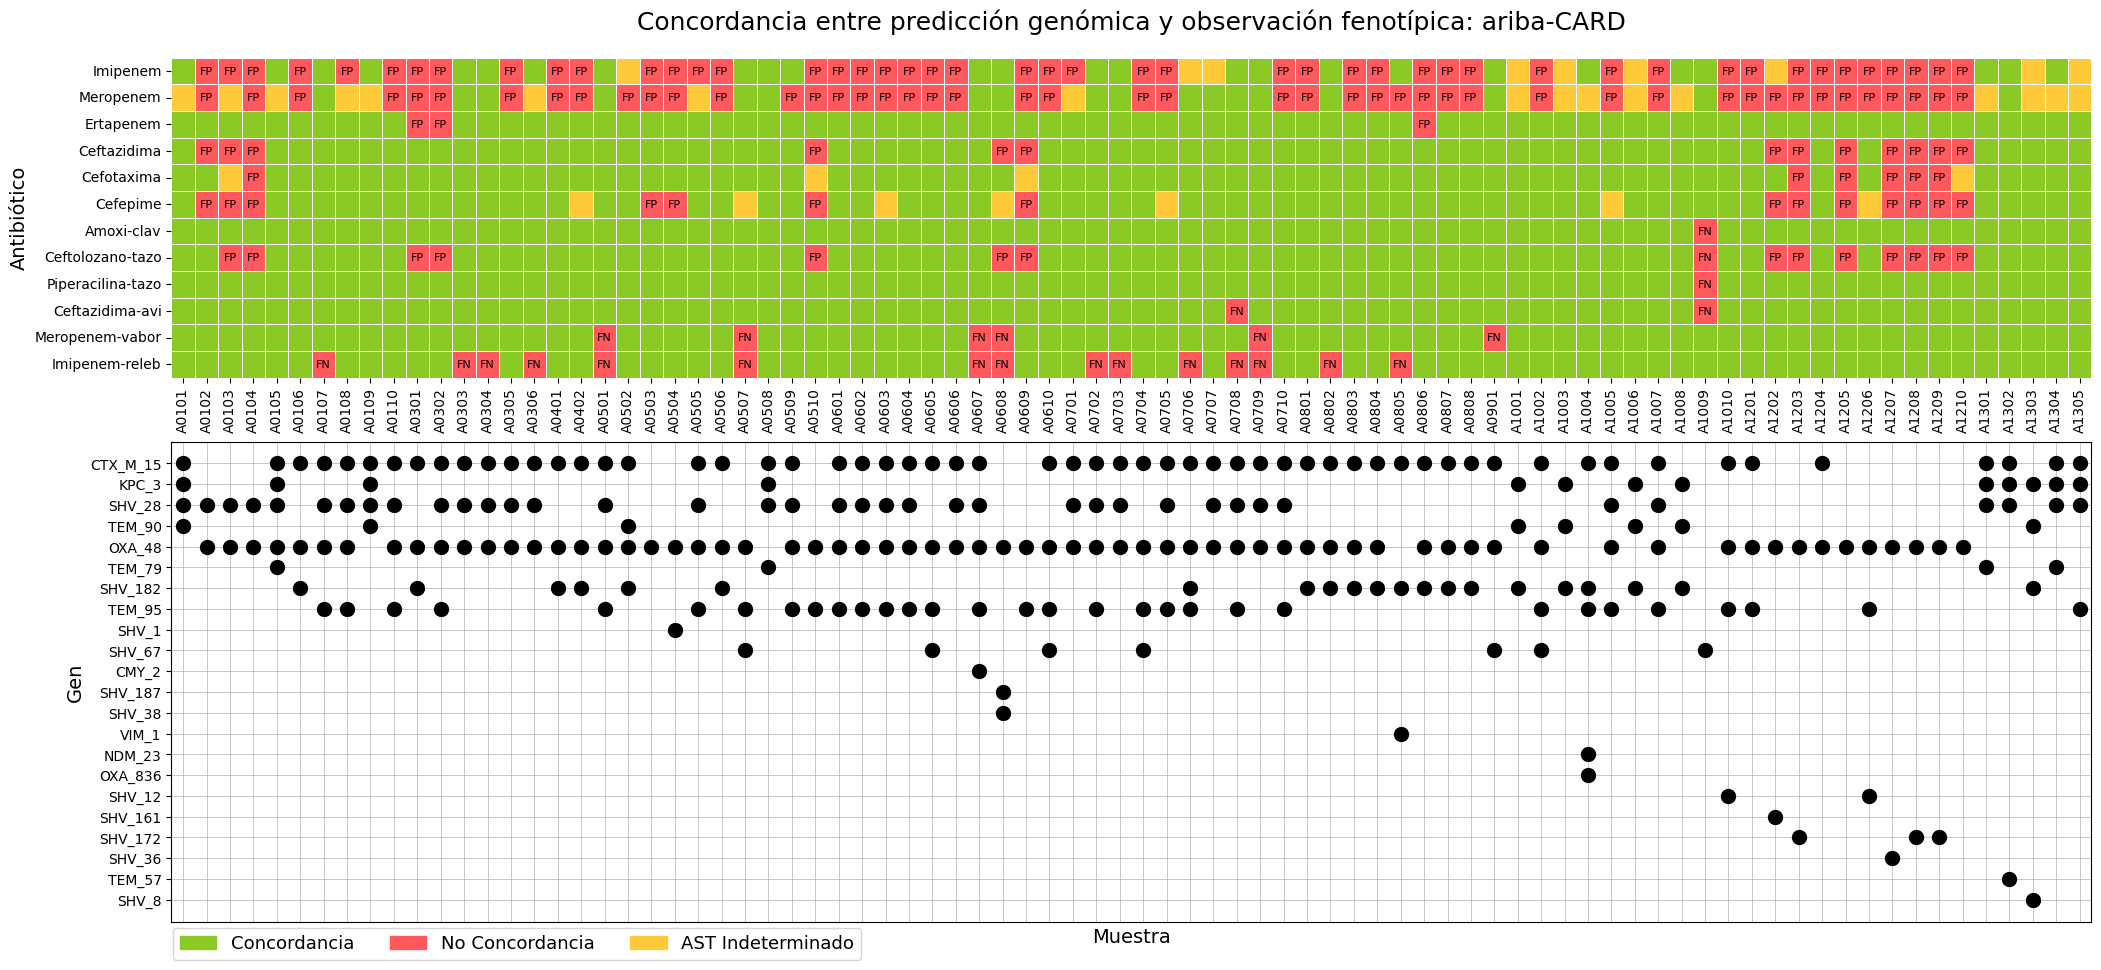

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd

antibiotics = heatmap_data.columns
samples = heatmap_data.index

transposed_heatmap_data = heatmap_data.T


category_to_color = {'TP': 0, 'TN': 1, 'FP': 2, 'FN': 3, 'Y': 4}
numeric_heatmap_data = np.vectorize(category_to_color.get)(transposed_heatmap_data)

annotation_mask = np.where((transposed_heatmap_data == 'FP') | (transposed_heatmap_data == 'FN'), 
                           transposed_heatmap_data, '')


cmap = sns.color_palette(['#8ac926', '#8ac926', '#ff595e', '#ff595e', '#ffca3a'])

fig = plt.figure(figsize=(12, 8))

# Section 1: Categorical Heatmap
# ------------------------------


ax1 = fig.add_axes([0.1, 0.3, 1.6, 0.4])  # [left, bottom, width, height]

# Plotting the categorical heatmap
sns.heatmap(numeric_heatmap_data, ax=ax1, cmap=cmap, xticklabels=samples, yticklabels=antibiotics, cbar=False, linewidths=0.5, linecolor='white', 
            annot=annotation_mask, fmt='', 
            annot_kws={'size': 8, 'color': 'black'})
ax1.set_title(f'Concordancia entre predicción genómica y observación fenotípica: {TOOL.replace("_", "-")}', fontsize=18, pad=20,)

# Section 2: Dot Matrix (Gene Presence)
# -------------------------------------

unique_genes = combined['gene_symbol_modified'].explode().unique()
gene_presence_data = pd.DataFrame(index=combined.index, columns=unique_genes, data=0)
for sample in combined.index:
    genes = combined.loc[sample, 'gene_symbol_modified']
    for gene in genes:
        gene_presence_data.loc[sample, gene] = 1


ax2 = fig.add_axes([0.1, -0.38, 1.6, 0.6], sharex=ax1)  # Same width as ax1
ax2.set_xlim(ax1.get_xlim())

gene_presence_data = gene_presence_data.T  # Transpose for plotting


x_labels = np.arange(len(gene_presence_data.columns))
y_labels = np.arange(len(gene_presence_data.index))
x, y = np.meshgrid(x_labels, y_labels)

x_flat = x.flatten() + 0.5
y_flat = y.flatten() + 0.5
presence_flat = gene_presence_data.values.flatten()


ax2.scatter(x_flat[presence_flat == 1], y_flat[presence_flat == 1], s=100, c='black', marker='o', zorder=5)
ax2.set_yticks(np.arange(len(gene_presence_data.index)) + 0.5)
ax2.set_yticklabels(gene_presence_data.index)

ax2.set_xticks(np.arange(len(gene_presence_data.columns)) + 0.5)

ax2.set_xticklabels(gene_presence_data.columns, rotation=90)

for label in ax2.get_xticklabels():
    label.set_visible(False)


ax2.tick_params(axis='x', which='both', bottom=False, top=False)


ax2.invert_yaxis()

ax2.xaxis.set_visible(True)

# Add gridlines specifically for the x-axis
ax2.grid(True, linewidth=0.5, zorder=1)

# set Y title for gene presence
ax2.set_ylabel('Gen', fontsize=14)
ax1.set_ylabel('Antibiótico', fontsize=14)
ax2.set_xlabel('Muestra', fontsize=14)

# Define the color to label mapping
color_to_label = {
    '#8ac926': 'Concordancia',    # Matches TP and TN
    '#ff595e': 'No Concordancia', # Matches FP and FN
    '#ffca3a': 'AST Indeterminado'    # Matches Y
}

# Create the legend
legend_handles = [mpatches.Patch(color=color, label=label) 
                  for color, label in color_to_label.items()]

plt.legend(handles=legend_handles, bbox_to_anchor=(0.18, -0.08), loc='lower center', ncol=3, borderaxespad=0., fontsize=13)



import datetime
today = datetime.date.today().strftime('%Y%m%d')
plt.savefig(f'output_dir/{today}_muestras_resistencias_{TOOL}.png', bbox_inches='tight', dpi=800)
plt.savefig(f'output_dir/{today}_muestras_resistencias_{TOOL}.svg', bbox_inches='tight', dpi=800)


# Display the plot
plt.show()
